In [1]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt
from matplotlib import rcParams
# import pyvista as pv
from matplotlib import ticker, cm

plt.style.use('dark_background')

rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [6, 6]

%matplotlib inline

In [49]:
# Define complex plane
z_r = np.linspace(-15.0, 15.0, num=250)
z_i = np.linspace(-np.pi, 0.25 * np.pi, num=250)
z = ( np.tensordot(z_r, np.ones_like(z_i), axes=0) + 
      1.0j*np.tensordot(np.ones_like(z_r), z_i, axes=0) )

X, Y = np.tensordot(z_r, np.ones_like(z_i), axes=0), np.tensordot(np.ones_like(z_r), z_i, axes=0)

In [72]:
def Z(z):
    sol = 1j * np.sqrt(np.pi) * np.exp(-z**2.0) * (1.0 + sp.erf(1j*z))
    return np.where(np.isnan(sol), 0, sol)

def Zprime(z):
    return -2 * (1 + z * Z(z))

def fac(n):
    return np.math.factorial(n)

def shifted_disp_para(zeta, n, k_para):
    return sum([(-1)**s / (fac(n+s) * fac(n-s)) * 0.5 * Zprime(zeta - s/k_para)
               for s in range(-n+1-1, n+1)])

def shifted_disp_perp(zeta, n, k_para):
    return sum([s * (-1)**s / (fac(n+s) * fac(n-s)) * Z(zeta - s/k_para)
               for s in range(-n+1-1, n+1)])

def V_parallel(z, k_perp, k_para, terms):
    arg = -2.0 * k_perp**2.0
    return -1.0 * sum([
        sp.poch(0.5, n) * sp.poch(1, n) / fac(n) * shifted_disp_para(z, n, k_para) * (arg) ** n
        for n in range(terms)
    ])

def V_perp(z, k_perp, k_para, terms):
    arg = -2.0 * k_perp**2.0
    return sum([
        sp.poch(0.5, n) * sp.poch(1, n) / fac(n) * shifted_disp_perp(z, n, k_para) * (arg) ** n
        for n in range(1,terms)
    ])

def standard(z, k_perp, k_para, terms):
    b = k_perp**2.0
    k = np.sqrt(k_perp**2.0 + k_para**2.0)
    return k_para - k_para * np.exp(-b**2.0)/(k**2.0) * sum([
        sp.iv(s, b) * (0.5 * Zprime(z - s/k_para) - s / k_para * Z(z - s/k_para))
        for s in range(-terms+1, terms)
    ])

# Parallel part only:
### Close to parallel

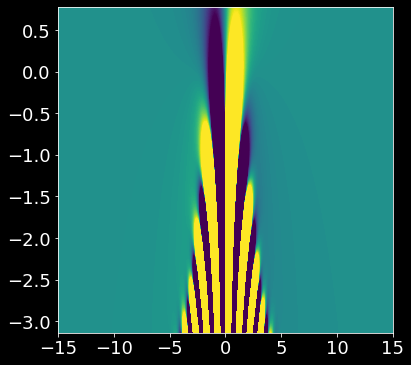

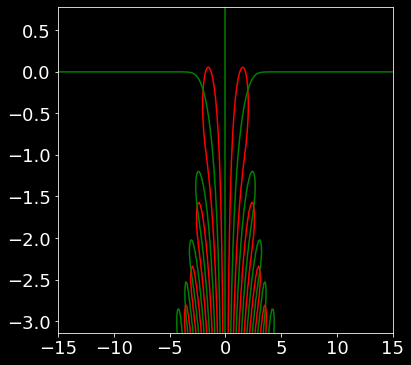

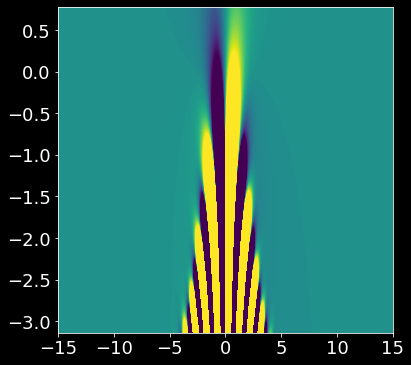

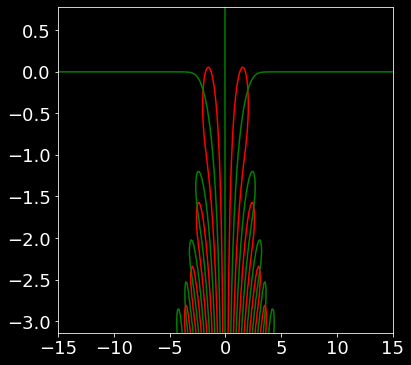

In [73]:
k_para = 0.5
k_perp = 0.01
k = np.sqrt(k_para ** 2.0 + k_perp ** 2.0)

func = (1 + V_parallel(z, k_perp, k_para, terms=5)/(k**2.0) + 
        V_perp(z, k_perp, k_para, terms=5)/(k**2.0)/k_para)

fun2 = standard(z, k_perp, k_para, terms=5)

cb = np.linspace(-1, 1, num=100)

plt.close('all')

plt.figure()
plt.contourf(X, Y, np.imag(func), cb, extend='both')

plt.figure()
plt.contour(X, Y, np.real(func), 0, colors='r')
plt.contour(X, Y, np.imag(func), 0, colors='g')

plt.figure()
plt.contourf(X, Y, np.imag(fun2), cb, extend='both')

plt.figure()
plt.contour(X, Y, np.real(fun2), 0, colors='r')
plt.contour(X, Y, np.imag(fun2), 0, colors='g')

plt.show()

### Closer to perpendicular

<ipython-input-72-d16afdf5793a>:2: RuntimeWarning: invalid value encountered in multiply
  sol = 1j * np.sqrt(np.pi) * np.exp(-z**2.0) * (1.0 + sp.erf(1j*z))


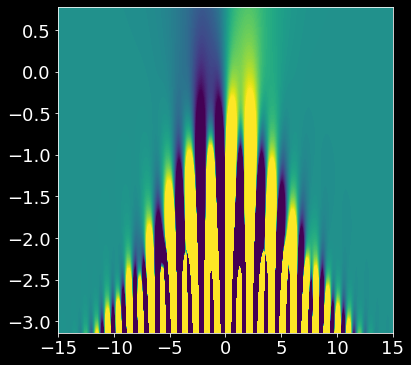

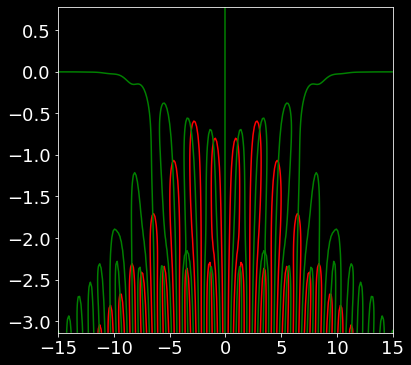

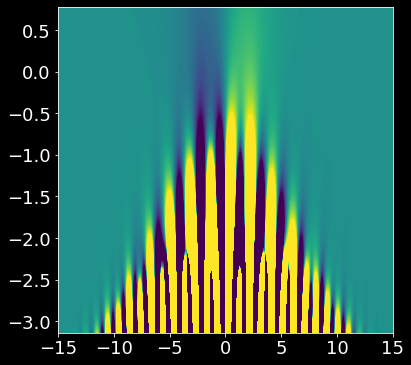

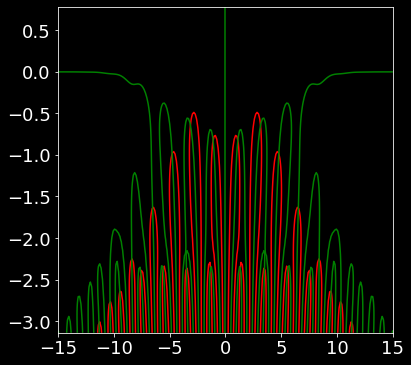

In [74]:
k_para = 0.5
k_perp = 0.75
k = np.sqrt(k_para ** 2.0 + k_perp ** 2.0)

func = (1 + V_parallel(z, k_perp, k_para, terms=10)/(k**2.0) +
        V_perp(z, k_perp, k_para, terms=10)/(k**2.0)/k_para)

fun2 = standard(z, k_perp, k_para, terms=10)

cb = np.linspace(-1, 1, num=100)

plt.close('all')

plt.figure()
plt.contourf(X, Y, np.imag(func), cb, extend='both')

plt.figure()
plt.contour(X, Y, np.real(func), 0, colors='r')
plt.contour(X, Y, np.imag(func), 0, colors='g')

plt.figure()
plt.contourf(X, Y, np.imag(fun2), cb, extend='both')

plt.figure()
plt.contour(X, Y, np.real(fun2), 0, colors='r')
plt.contour(X, Y, np.imag(fun2), 0, colors='g')

plt.show()

### Almost fully perpendicular

<ipython-input-72-d16afdf5793a>:2: RuntimeWarning: invalid value encountered in multiply
  sol = 1j * np.sqrt(np.pi) * np.exp(-z**2.0) * (1.0 + sp.erf(1j*z))


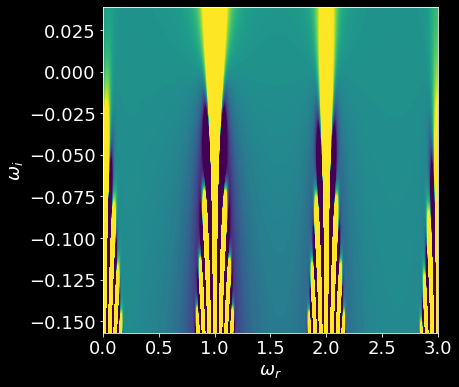

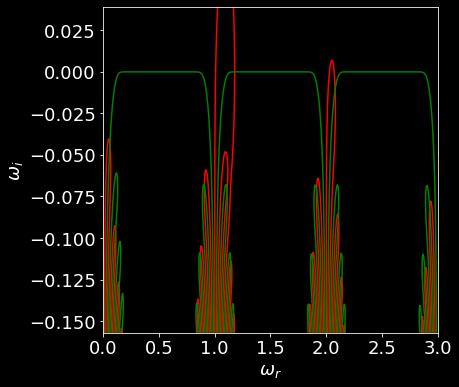

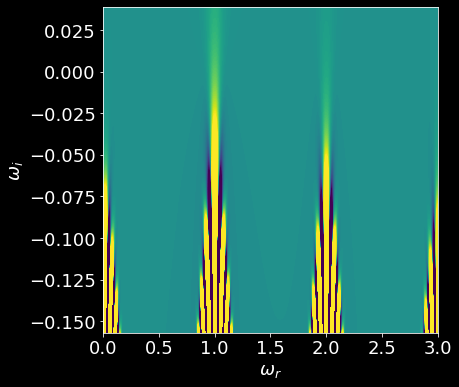

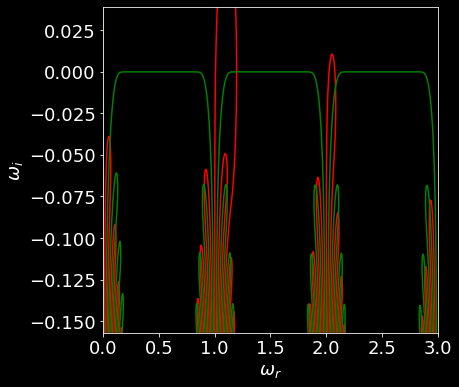

In [90]:
k_para = 0.05
k_perp = 0.9
k = np.sqrt(k_para ** 2.0 + k_perp ** 2.0)

# Define complex plane
z_r = np.linspace(0, 60.0, num=500)
z_i = np.linspace(-np.pi, 0.25 * np.pi, num=250)
z = ( np.tensordot(z_r, np.ones_like(z_i), axes=0) + 
      1.0j*np.tensordot(np.ones_like(z_r), z_i, axes=0) )

X, Y = np.tensordot(z_r, np.ones_like(z_i), axes=0), np.tensordot(np.ones_like(z_r), z_i, axes=0)

func = (1 + V_parallel(z, k_perp, k_para, terms=20)/(k**2.0) +
        V_perp(z, k_perp, k_para, terms=20)/(k**2.0)/k_para)

fun2 = standard(z, k_perp, k_para, terms=20)

cb = np.linspace(-1, 1, num=100)

plt.close('all')

om_r = k_para * X
om_i = k_para * Y

plt.figure()
plt.contourf(om_r, om_i, np.imag(func), cb, extend='both')
plt.xlabel(r'$\omega_r$')
plt.ylabel(r'$\omega_i$')

plt.figure()
plt.contour(om_r, om_i, np.real(func), 0, colors='r')
plt.contour(om_r, om_i, np.imag(func), 0, colors='g')
plt.xlabel(r'$\omega_r$')
plt.ylabel(r'$\omega_i$')

plt.figure()
plt.contourf(om_r, om_i, np.imag(fun2), cb, extend='both')
plt.xlabel(r'$\omega_r$')
plt.ylabel(r'$\omega_i$')

plt.figure()
plt.contour(om_r, om_i, np.real(fun2), 0, colors='r')
plt.contour(om_r, om_i, np.imag(fun2), 0, colors='g')
plt.xlabel(r'$\omega_r$')
plt.ylabel(r'$\omega_i$')

plt.show()